#**Tutorial 6: Large Scale Climate Variability - ENSO**

> Indented block

> Indented block




**Week 1, Day 3, Remote Sensing**

**Content creators:** Douglas Rao

**Content reviewers:** TBD

**Content editors:** TBD

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

#**Tutorial Objectives**

In this tutorial, you will learn the basics of the El Nino-Southern Oscillation (ENSO) - one of the most influencial large-scale climate variability that affects weather and climate.

By the end of this tutorial you will be able to:

* Understand the concept of ENSO and three different phases of the ENSO
* Use satellite based sea surface temperature data to calculate index for ENSO monitoring


#**Setup**



In this section, we have:


1.   **Import cell:** imports all libraries you use in the tutorial.
2.   **Hidden Figure settings cell:** sets up the plotting style (copy exactly)
1.   **Hidden Plotting functions cell:** contains all functions used to create plots throughout the tutorial (so students don't waste time looking at boilerplate matplotlib but can here if they wish to). Please use only matplotlib for plotting for consistency.
2.   **Hidden Helper functions cell:** This should contain functions that students have previously used or that are very simple. Any helper functions that are being used for the first time and are important should be placed directly above the relevant text or exercise (see Section 1.1 for an example).
    



In [1]:
#Imports

# Import only the libraries/objects that you use in this tutorial. 

# If any external library has to be installed, !pip install library --quiet
# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

# Properly install cartopy in colab to avoid session crash
# !apt-get install libproj-dev proj-data proj-bin --quiet
# !apt-get install libgeos-dev --quiet
# !pip install cython --quiet
# !pip install cartopy --quiet

# !apt-get -qq install python-cartopy python3-cartopy  --quiet
# !pip uninstall -y shapely  --quiet
# !pip install shapely --no-binary shapely  --quiet

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs

In [3]:
# @title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")


# **Section 1: El Niño-Southern Oscillation (ENSO)**


In [4]:
# @title Video 1: Video 1 Name 
#Tech team will add code to format and display the video

One of the most commonly discussed large scale climate variability is El Niño-Southern Oscillation (ENSO). 

ENSO is one of the most important climate phenomena on Earth due to its ability to change the global atmospheric circulation, which in turn, influences temperature and precipitation across the globe. 

Though ENSO is a single climate phenomenon, it has three states, or phases, it can be in.  

- El Niño: A warming of the ocean surface, or above-average sea surface temperatures, in the central and eastern tropical Pacific Ocean.
- La Niña: A cooling of the ocean surface, or below-average sea surface temperatures, in the central and eastern tropical Pacific Ocean.
- Neutral: Neither El Niño or La Niña. Often tropical Pacific SSTs are generally close to average. 

In other words, we need to use sea surface temperature to study the ENSO. In this tutorial, we will use the Optimum Interpolated Sea Surface Temperature (OISST) CDR data from NOAA to calculate ENSO and reproduce the famous ENSO figure. 


##**Section 1.1: Calculate SST Anomaly**

OISST data is originally produced at daily and 1/4° spatial resolution. To avoid the large amount of data processing, we use the monthly aggregated OISST SST data provided by NOAA Physical Systems Laboratory. 

In [5]:
# Option 1: Download data
# Download the monthly sea surface temperature data from NOAA Physical System
# Laboratory. The data is processed using the OISST SST Climate Data Records
# from NOAA CDR program.
# The data downloading may take 2-3 minutes to complete.
!wget https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc
url = 'sst.mon.mean.nc'

## Option 2: Use the data stored in the workspace
#url = 'asset/data/sst.mon.mean.nc'

--2023-04-27 21:36:18--  https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2069519621 (1.9G) [application/x-netcdf]
Saving to: ‘sst.mon.mean.nc’

sst.mon.mean.nc     100%[===================>]   1.93G  7.40MB/s    in 4m 39s  

2023-04-27 21:40:57 (7.09 MB/s) - ‘sst.mon.mean.nc’ saved [2069519621/2069519621]



In [8]:
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:  (time: 499, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

The monthly OISST data is available starting from September of 1981. The ENSO is often identified using monthly SST anomaly over a defined regions. There are various different regions used to monitor and study ENSO:

- Niño 1+2 (0-10S, 90W-80W)
- Niño 3 (5N-5S, 150W-90W)
- Niño 3.4 (5N-5S, 170W-120W)
- Niño 4 (5N-5S, 160E-150W)

These regions are identified in the map below provided by NOAA Climate portal.

![Location of four different nino regions (Credit: NOAA)](https://www.climate.gov/sites/default/files/Fig3_ENSOindices_SST_large.png)

The Niño 3.4 (5N-5S, 170W-120W) region is the most commonly used region for ENSO monitoring.

To calculate ENSO index, we will first get the monthly anomaly of the SST data.

In [9]:
# Get 30-year climatology from 1982-2011
sst_30yr = ds.sst.sel(time=slice('1982-01-01', '2011-12-01'))
# Calculate monthly climatology
sst_clim = sst_30yr.groupby('time.month').mean()
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 720, lon: 1440)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7287635, -1.7287526, -1.7286988, ..., -1.7289139,
         -1.7288494, -1.7288171],
        [-1.7309033, -1.7308816, -1.730871 , ..., -1.7310215,
         -1.7309355, -1.7309355],
        [-1.7318064, -1.7318064, -1.7318064, ..., -1.7318171,
         -1.7318171, -1.7318064]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6975778, -1.6975555, -1.6975555, ..., -1.6976666,
         -1.6976445, -1.6976111],
        [-1.6984556, -1.6984444, -1.6984444, ..., -1.6984888,
         -1.6984888, -1.6984779],
        [-1.6989443, -1.6989443, -1.6989443, ..., -1.6989555,
         -1.6989443, -1.6989443]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7280644, -1.7280538, -1.7279785, ..., -1.7281612,
         -1.728129 , -1.728086 ],
        [-1.7293117, -1.7292688, -1.7292796, ..., -1.7293334,
         -1.7293334, -1.7293334],
        [-1.7297848, -1.7297848, -1.7297742, ..., -1.7297957,
         -1.7297957, -1.7297957]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

In [10]:
# Calculate monthly anomaly
sst_anom = ds.sst.groupby('time.month') - sst_clim
sst_anom

<xarray.DataArray 'sst' (time: 499, lat: 720, lon: 1440)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01085556, -0.01088881, -0.01158893, ..., -0.01072216,
         -0.01075554, -0.0104444 ],
        [-0.01407778, -0.01444447, -0.01443326, ..., -0.01364446,
         -0.01367772, -0.01403332],
        [-0.01648891, -0.01648891, -0.01648891, ..., -0.01645565,
         -0.01646674, -0.01647782]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.00019252, -0.01161706, -0.01914048, ..., -0.0257374 ,
         -0.01934433, -0.00403416],
        [-0.00681436, -0.03324294, -0.04361212, ..., -0.04890966,
         -0.03929067, -0.01251686],
        [-0.06280577, -0.06280577, -0.06280577, ..., -0.06280577,
         -0.06280577, -0.06280577]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.00821507, -0.00633335, -0.0134517 , ..., -0.0206989 ,
         -0.01136565,  0.00568819],
        [ 0.00094616, -0.02841938, -0.03970969, ..., -0.03993547,
         -0.0289892 ,  0.0009892 ],
        [-0.05611825, -0.05611825, -0.05612898, ..., -0.05610752,
         -0.05610752, -0.05610752]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    month    (time) int64 9 10 11 12 1 2 3 4 5 6 7 ... 5 6 7 8 9 10 11 12 1 2 3

Now, we can take a look at the SST anomaly of a given month. We use January of 1998 to show the specific change of SST during that time period.

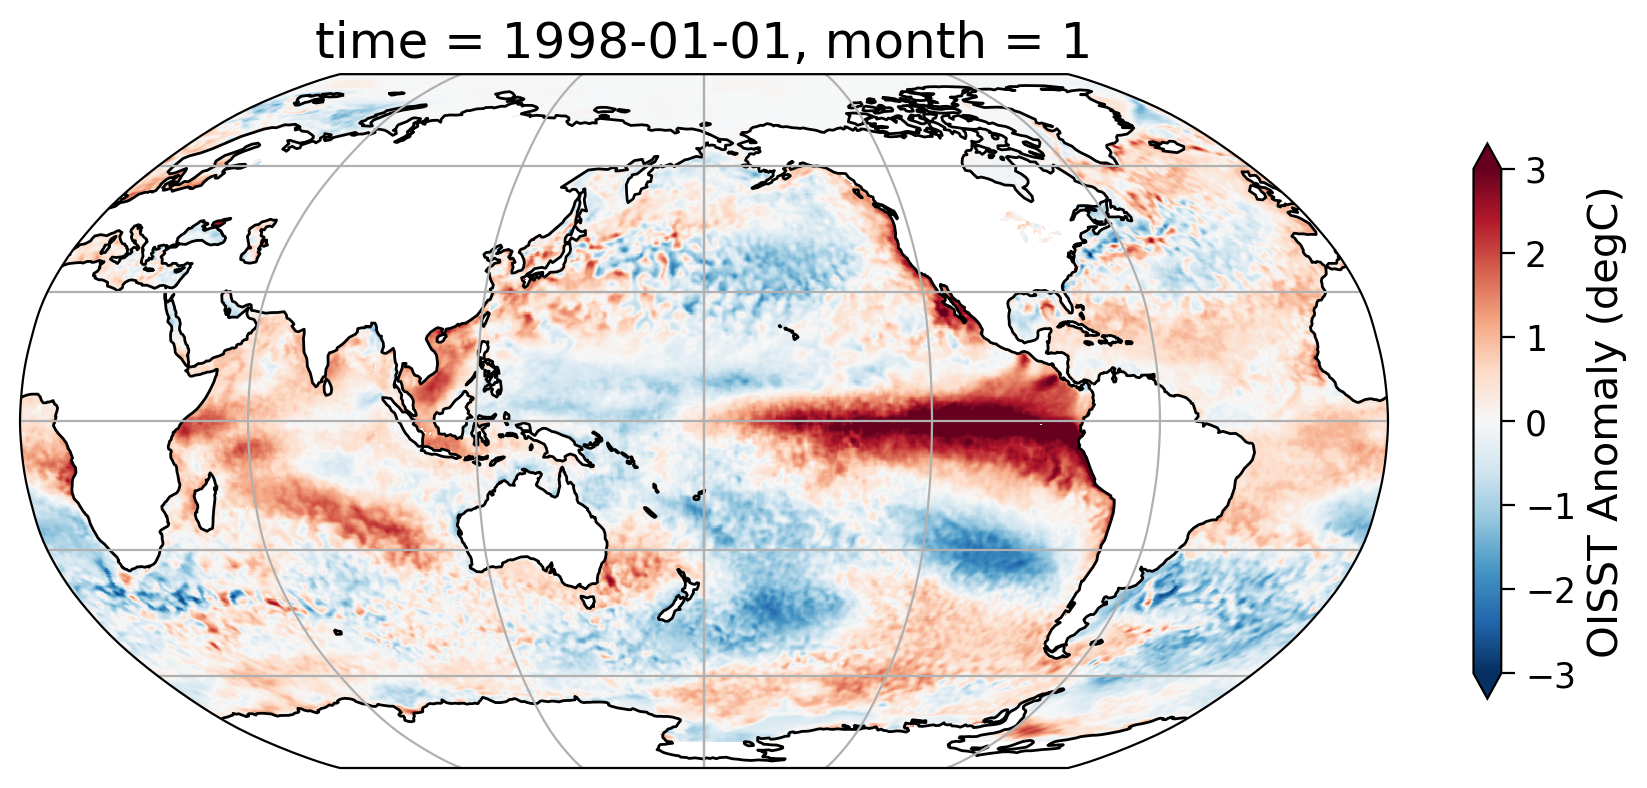

In [11]:
sst = sst_anom.sel(time='1998-01-01')
# Initate plot
fig = plt.figure(figsize=(9,6))
# Focus on the ocean with the central_longitude=180
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin = -3, vmax = 3, cmap='RdBu_r',
         cbar_kwargs=dict(shrink=0.5, label='OISST Anomaly (degC)'))

## **Section 1.2: Monitoring ENSO with Oceanic Niño Index**

Oceanic Niño Index (ONI) is a common index used to monitor ENSO. It is calculated using the same region with Niño 3.4 (5N-5S, 170W-120W) with a 3-month rolling mean.

You may have noticed that the `lon` for the SST data from PSL is organized between 0°–360°E. This is different from how we typically use `longitude` (-180°–180°). How do we covert the value of longitude between two systems (0-360° v.s. -180°–180°).

The longitude of 0°-360° can be viewed as the equivalent of (0–180°, -180°–0°). So the Niño 3.4 region should be (-5°–5°, 190–240°)

In [12]:
## Extract SST data for the Nino 3.4 regions
sst_nino34 = sst_anom.sel(lat=slice(-5,5), lon=slice(190,240))
sst_nino34

<xarray.DataArray 'sst' (time: 499, lat: 40, lon: 200)>
array([[[-6.6952324e-01, -6.8036652e-01, -6.9387817e-01, ...,
          2.7665520e-01,  2.9633331e-01,  3.0166626e-01],
        [-6.8328857e-01, -7.0653343e-01, -6.8220139e-01, ...,
          3.0854225e-01,  3.2086754e-01,  3.1760025e-01],
        [-7.1691132e-01, -7.0237732e-01, -6.6709900e-01, ...,
          3.2836533e-01,  3.4766769e-01,  3.5606766e-01],
        ...,
        [-2.9464340e-01, -2.7273369e-01, -2.9377937e-01, ...,
          3.7908936e-01,  4.2235565e-01,  3.7262344e-01],
        [-3.8198853e-01, -2.9972267e-01, -2.7863312e-01, ...,
          4.8749924e-01,  4.9467659e-01,  4.1401100e-01],
        [-4.4705391e-01, -3.3727837e-01, -2.4283218e-01, ...,
          4.7604561e-01,  4.4177818e-01,  3.4271049e-01]],

       [[-5.4868889e-01, -4.6297836e-01, -4.1404152e-01, ...,
         -1.2102318e-01, -7.1926117e-02, -3.1698227e-02],
        [-5.5763435e-01, -4.8567772e-01, -4.2441940e-01, ...,
         -1.3505363e-01, -9.9536896e-02, -8.0753326e-02],
        [-5.0934410e-01, -4.7403145e-01, -4.2031288e-01, ...,
         -1.2633324e-01, -1.3010597e-01, -1.2980652e-01],
...
        [-1.6960335e-01, -1.6771317e-01, -1.6123009e-01, ...,
         -6.9572449e-02, -8.1411362e-02, -9.6950531e-02],
        [-1.1129379e-01, -1.0183716e-01, -8.9185715e-02, ...,
         -6.7663193e-02, -6.6312790e-02, -7.3528290e-02],
        [-3.2627106e-02, -2.5947571e-02, -1.3866425e-02, ...,
         -9.2319489e-02, -8.3372116e-02, -7.8277588e-02]],

       [[-1.8301964e-01, -2.0790291e-01, -2.2549438e-01, ...,
          4.3411827e-01,  4.5708656e-01,  4.6546364e-01],
        [-1.9051552e-01, -2.0609665e-01, -2.1908569e-01, ...,
          4.9095726e-01,  5.0812912e-01,  5.1105499e-01],
        [-1.8891525e-01, -1.8797684e-01, -1.9227982e-01, ...,
          5.3818321e-01,  5.5101204e-01,  5.4544258e-01],
        ...,
        [ 4.0202141e-01,  4.0765572e-01,  4.0278435e-01, ...,
          4.4870377e-02,  5.4492950e-02,  6.8687439e-02],
        [ 4.1335487e-01,  4.1968918e-01,  4.1587067e-01, ...,
          2.1097183e-02,  3.5753250e-02,  5.7828903e-02],
        [ 4.0184975e-01,  4.0368843e-01,  4.0332222e-01, ...,
          1.0612488e-02,  3.2430649e-02,  5.9095383e-02]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -4.875 -4.625 -4.375 -4.125 ... 4.375 4.625 4.875
  * lon      (lon) float32 190.1 190.4 190.6 190.9 ... 239.1 239.4 239.6 239.9
    month    (time) int64 9 10 11 12 1 2 3 4 5 6 7 ... 5 6 7 8 9 10 11 12 1 2 3

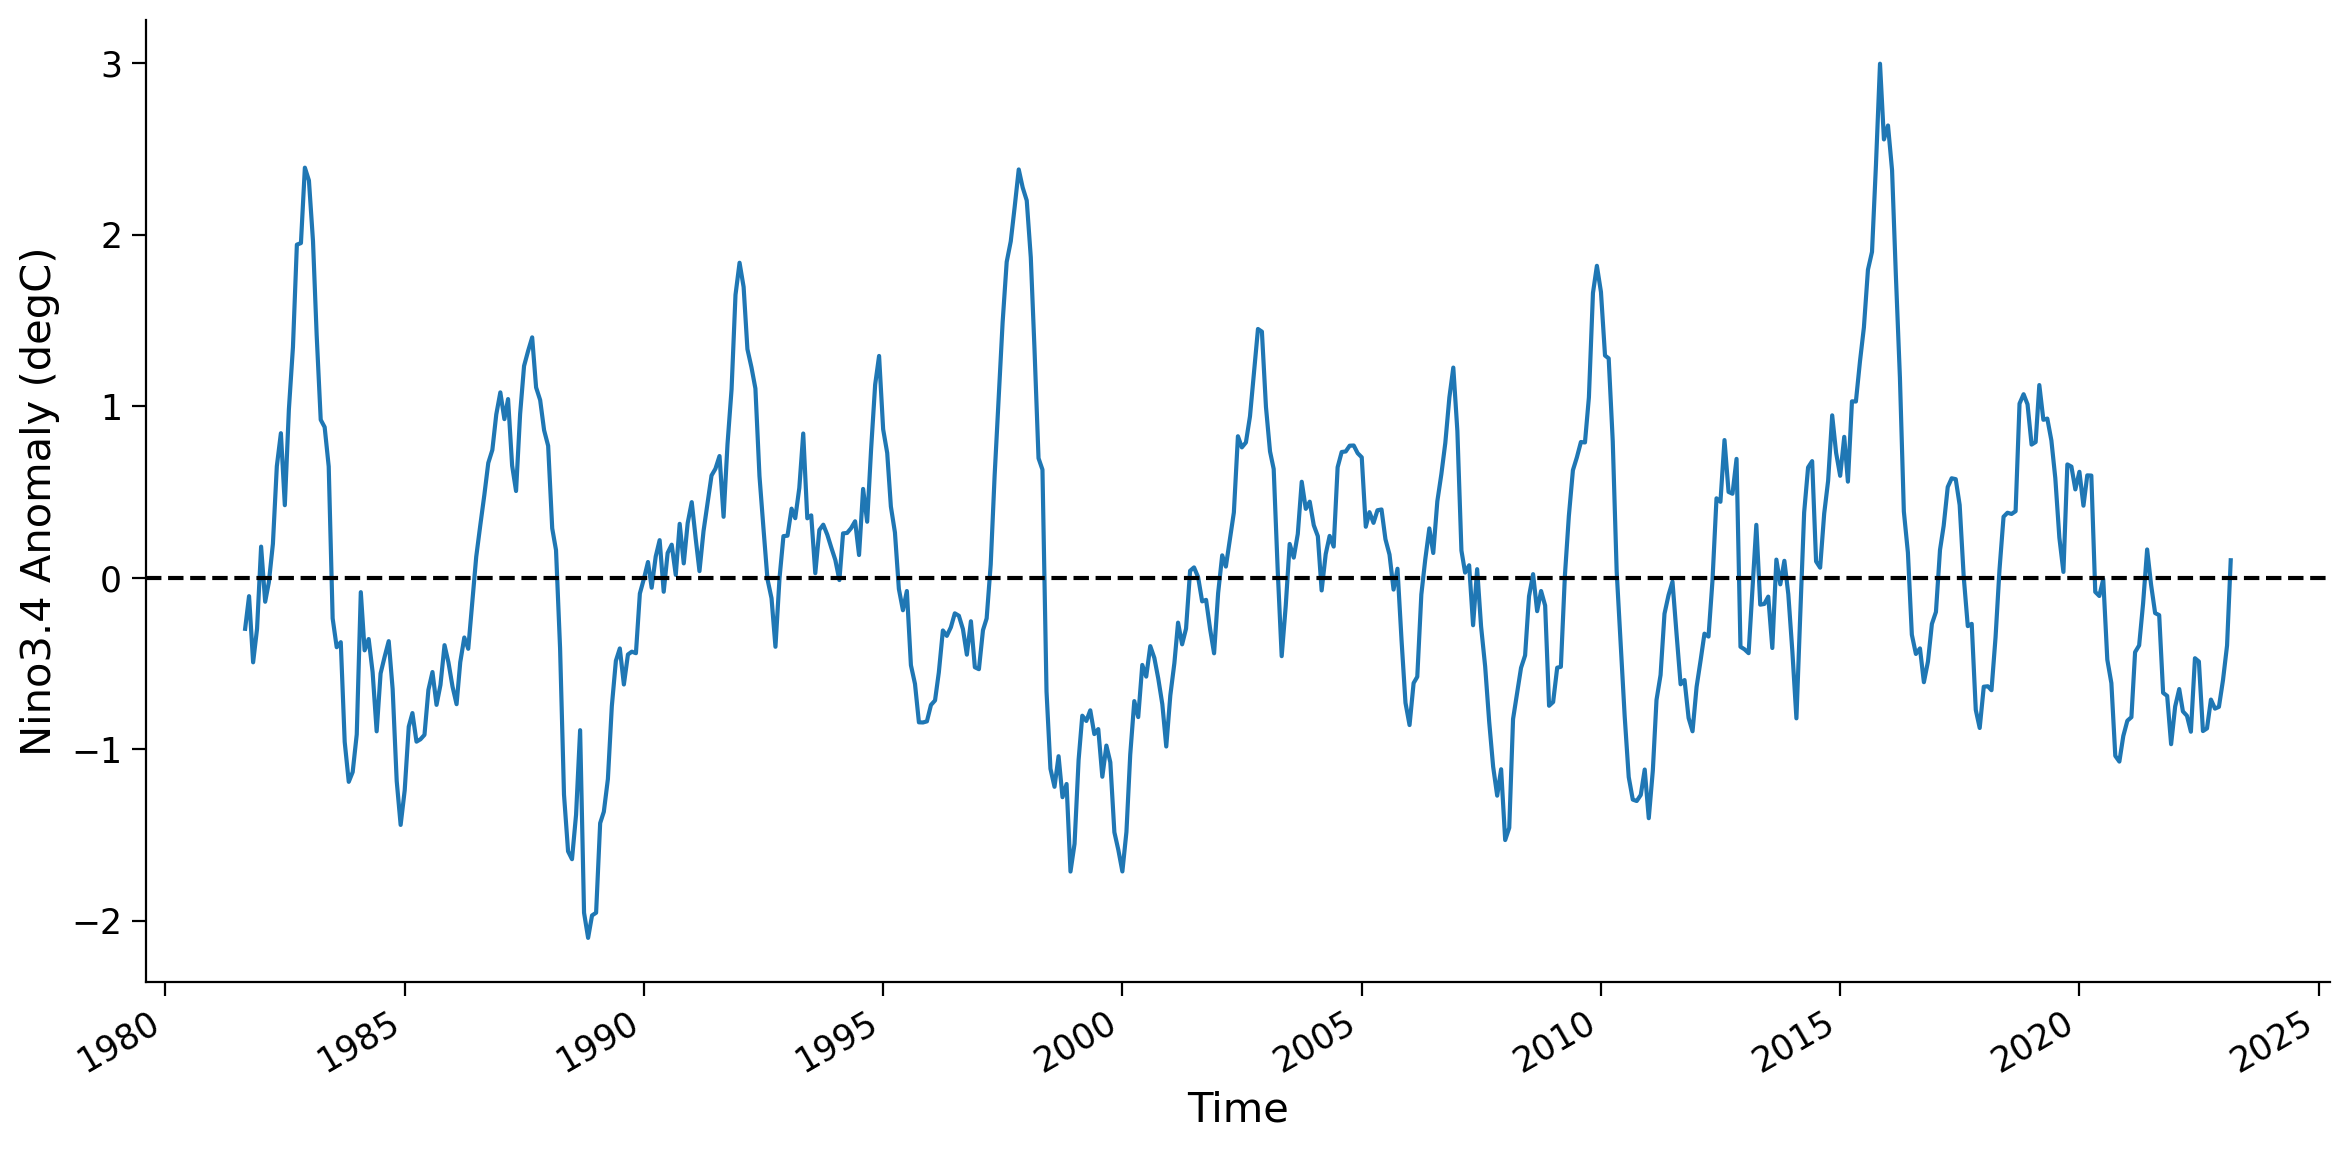

In [13]:
# Calculate the mean values for the Nino 3.4 region
fig=plt.figure(figsize=(12,6))
nino34 = sst_nino34.mean(dim=['lat', 'lon'])
nino34.plot()
plt.ylabel('Nino3.4 Anomaly (degC)')
plt.axhline(y=0, color='k', linestyle='dashed')

The Oceanic Nino Index (ONI) is defined as the 3-month rolling mean of the monthly regional average of the SST anomaly for the Nino 3.4 region. We can use `.rolling()` to calculate the ONI value for each month from the OISST monthly anomaly.

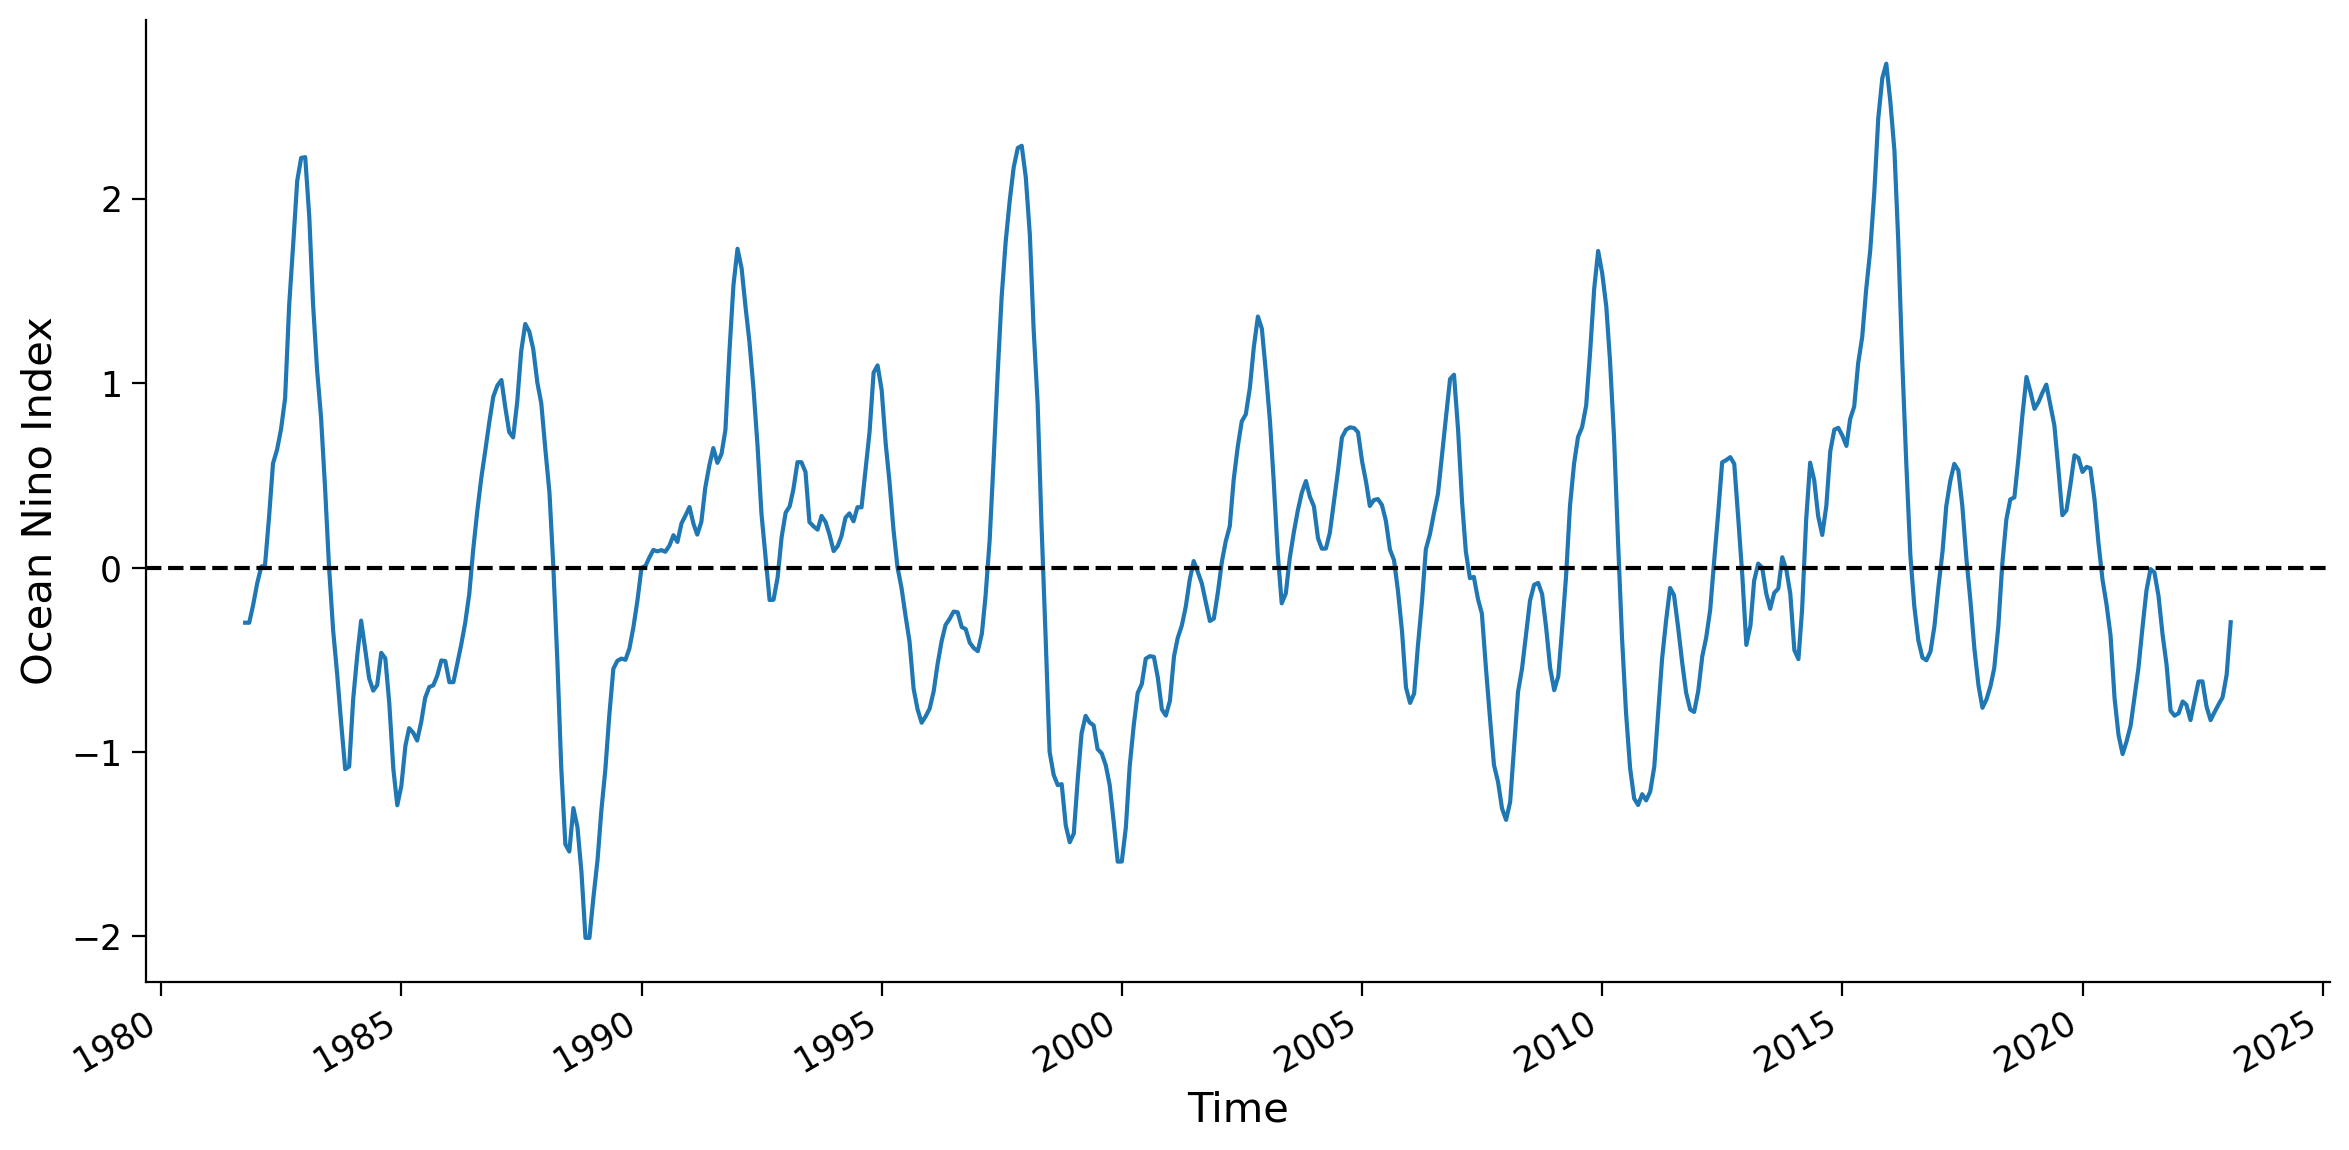

In [14]:
# Calculate 3-month rolling mean of Nino 3.4 anomaly for the ONI
fig=plt.figure(figsize=(12,6))
oni = nino34.rolling(time=3, center=True).mean()
oni.plot()
plt.ylabel('Ocean Nino Index')
plt.axhline(y=0, color='k', linestyle='dashed')

Often the different phases of ENSO is defined based on a threshold of 0.5 with ONI index. 

- El Niño: ONI values higher than 0.5 - which means surface waters in the east-central tropical Pacific are 0.5 degrees Celsius or more warmer than normal.
- La Niña: ONI values lower than -0.5 - which indicates the region is 0.5 degrees Celsius or more cooler than normal.

The neutral phase is when ONI values are in between these two thresholds. We can make the ONI plot that is similarly used by NOAA and other organizations to monitor ENSO phases.

Text(0.5, 1.0, 'Oceanic Niño Index')

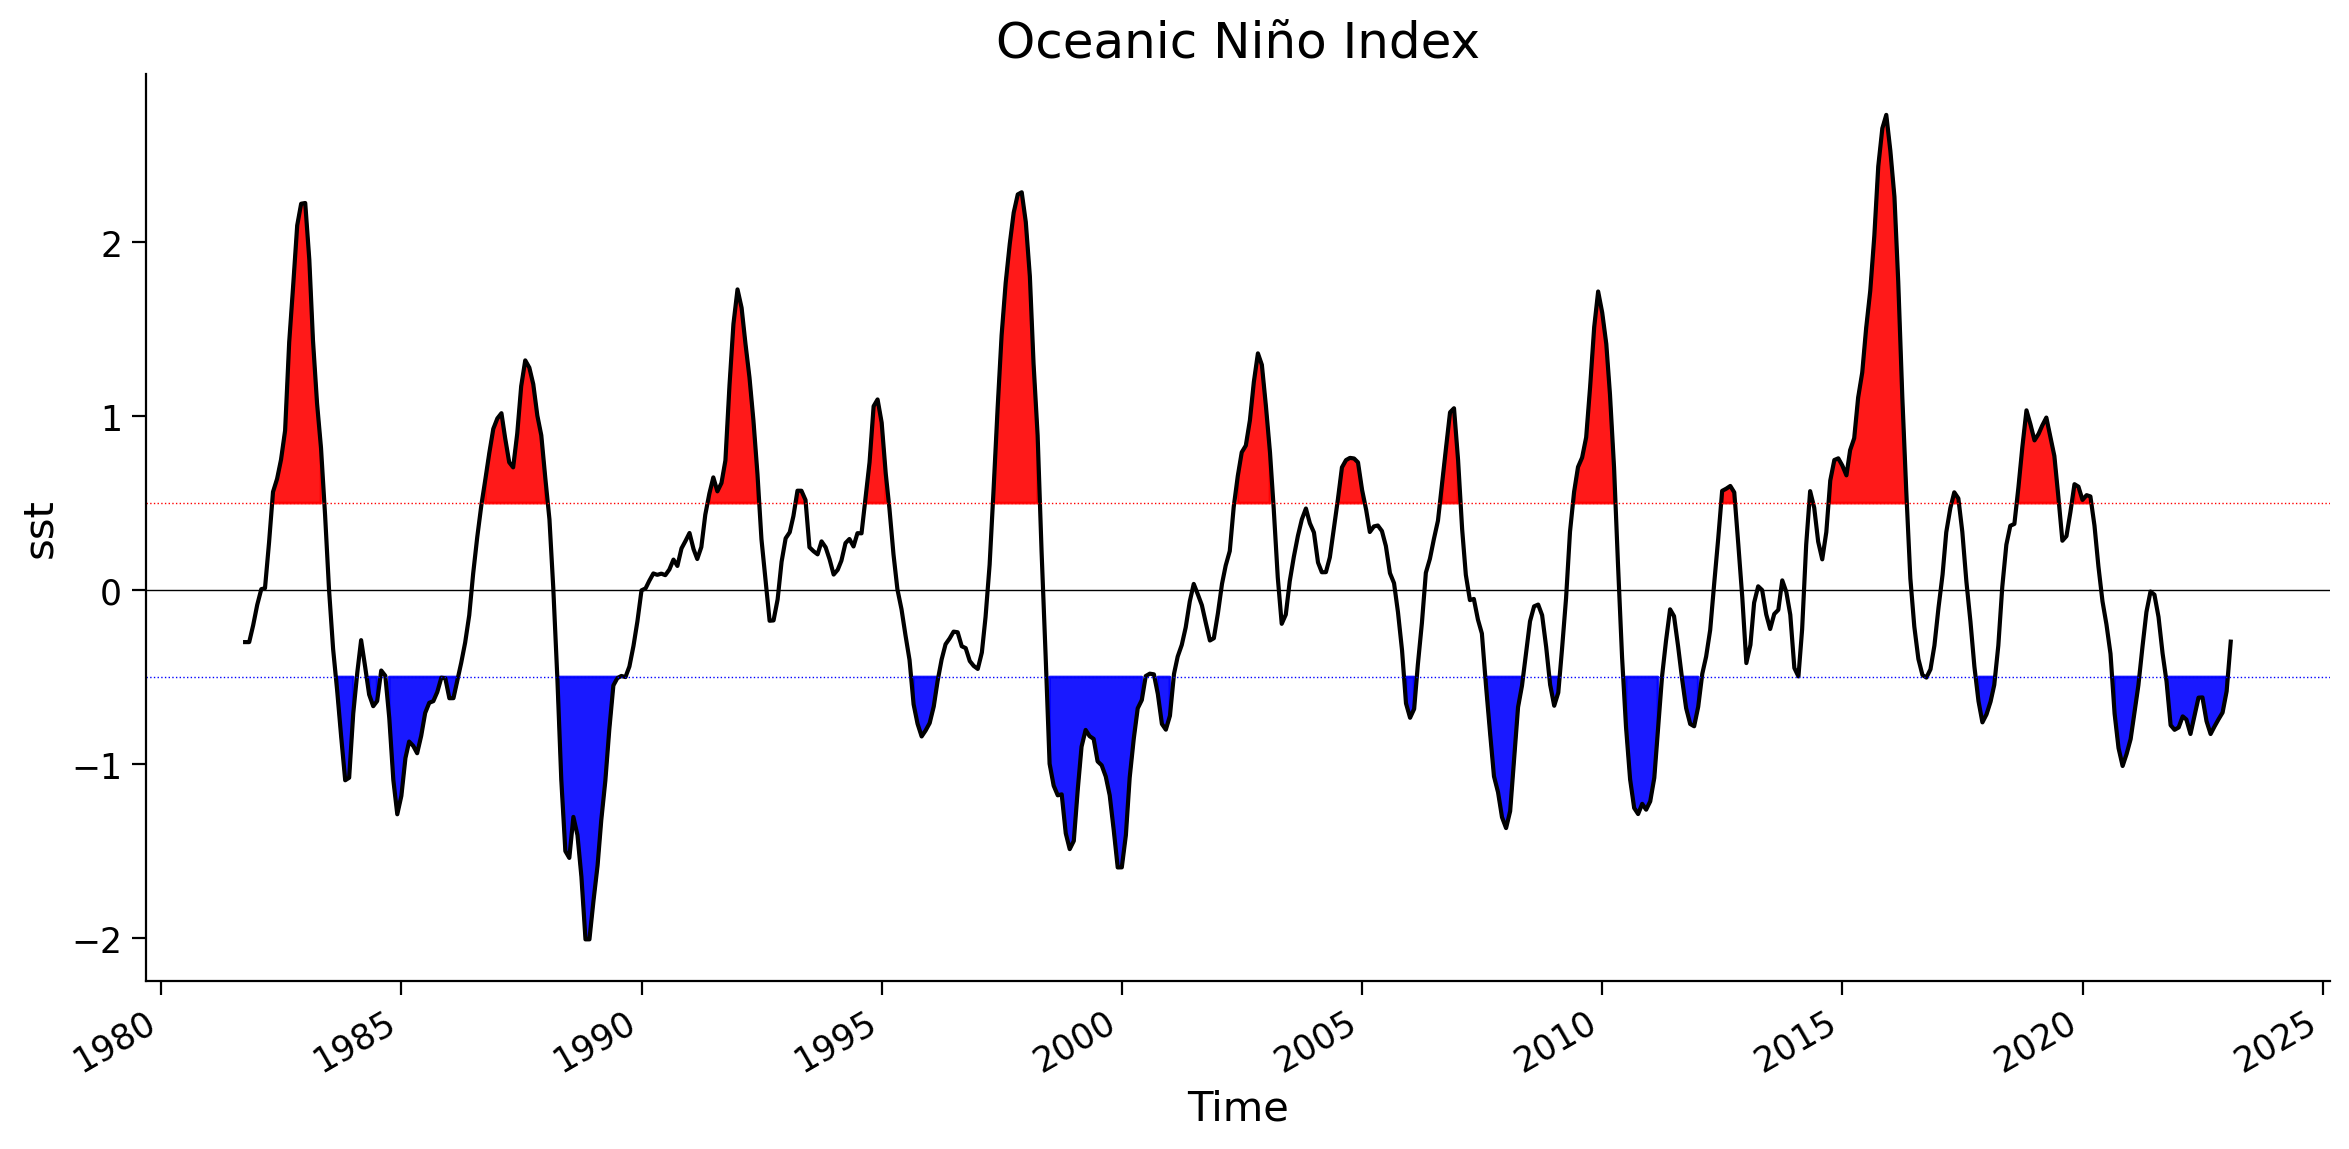

In [15]:
# Set up the plot size
fig = plt.figure(figsize=(12, 6))
# Create the filled area when ONI values are above 0.5 for El Nino
plt.fill_between(
    oni.time.data,
    oni.where(
        oni >= 0.5
    ).data, 0.5,
    color='red',
    alpha=0.9,
)
# Create the filled area when ONI values are below -0.5 for La Nina
plt.fill_between(
    oni.time.data,
    oni.where(
        oni <= -0.5
    ).data, -0.5,
    color='blue',
    alpha=0.9,
)
# Create the time series of ONI
oni.plot(color='black')
# Add the threshold lines on the plot
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.5, color='red', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.5, color='blue', linewidth=0.5, linestyle='dotted')
plt.title('Oceanic Niño Index')

From the plot, we can see the historical ENSO phases swing from El Nino to La Nina events. The major ENSO events like 1997-1998 shows up very clearly on the ONI plot. 

We will use the ONI data to perform analysis to understand the impact of ENSO on precipitation. So we export the ONI time series here into a netCDF file for future use via `.to_netcdf()`.

In [16]:
oni.to_netcdf('t6_oceanic-nino-index.nc')

### **Exercise: What is the difference when using different climatology period?**

As we learned here, ENSO is monitored using the anomaly of SST data for a specific region (e.g., Nino 3.4). Will the change of climatology period affect the ENSO phases significantly? You can explore it in this exercise.

Please compare the ONI time series calculated using two different climatology period (1982-2011 v.s. 1991-2020). 



In [17]:
################################################################################
# Exercise: Compare ONI time series using two different climatology period.    #
################################################################################

# Step 1: Calculate climatology of 1982-2010.

# Step 2: Calculate climatology of 1991-2020.

# Step 3: Calculate anomaly against two different climatology period.

# Step 4: Calculate ONI values using rolling mean for Nino 3.4 region. 

# Step 5: Compare the two ONI time series and visualize the difference as a
#         time series plot



'''

Please describe the difference between two ONI time series using different 
climatology time period:

'''

'\n\nPlease describe the difference between two ONI time series using different \nclimatology time period:\n\n'

#**Summary**

In this tutorial, we learned the basic concepts of ENSO and how satellite data can be used to monitor it.

* ENSO is one of the most influencial climate phenomena on Earth due to its ability to change the global atmospheric circulation. 
* The three phases of ENSO can be monitored using SST data from satellite through SST anomaly for select regions.
* The Oceanic Nino Index is used to produce the historical image for past El Nino and La Nina events.

In the next tutorial, we will use the ONI calculated here to assess the impact of ENSO on precipitation for select regions.
